In [1]:
from statsmodels.tsa.stattools import adfuller
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
def non_stationary_data(dataset):
    """
    Takes a dataset than check for all columns if they are stationary
    
    Parameters:
    - dataset: pd.dataFrame
    
    Returns:
    String that infomrs what columns are non stationary
    """

    # return values
    non_stationary_columns = []
    non_stationary_values = []

    # iterate over the df:
    for column_name, column_values in dataset.items():
        current_p = adfuller(column_values)[1]
        if current_p >= 0.05:
            non_stationary_columns.append(column_name)
            non_stationary_values.append(current_p)
    return non_stationary_columns, non_stationary_values

In [4]:
# load data
csv_file_path = './CORUMBA.csv'
# corumba = pd.read_csv(csv_file_path, skiprows=1, header=0).iloc[:, 1:-1  ]
corumba = pd.read_csv(csv_file_path, skiprows=1, header=0)
corumba = corumba.iloc[:, 1:-1]  #droping the first and last columns
# corumba = corumba.iloc[:-5, 1:-1]  #droping the first and last columns and last 5 lines
# print(corumba)
# non_stationary_data_var = non_stationary_data(corumba)
# print('Colunas não estacionárias: ' + str(non_stationary_data(corumba.dropna())[0]))
# print('Colunas não estacionárias: ' + str(stationary_data[0]))
# print('Valores de p: ' + str(stationary_data[1]))

In [ ]:
# JAN
plt.plot(corumba['ANO'], corumba['JAN'], marker='o', linestyle='-')
plt.show()

In [ ]:
# FEV
plt.plot(corumba['ANO'], corumba['FEV'], marker='o', linestyle='-')
plt.show()

In [ ]:
corumba['DIFFFEV']= corumba['FEV'].diff()
corumba

In [ ]:
# DIFFFEV
plt.plot(corumba['ANO'], corumba['DIFFFEV'], marker='o', linestyle='-')
plt.show()

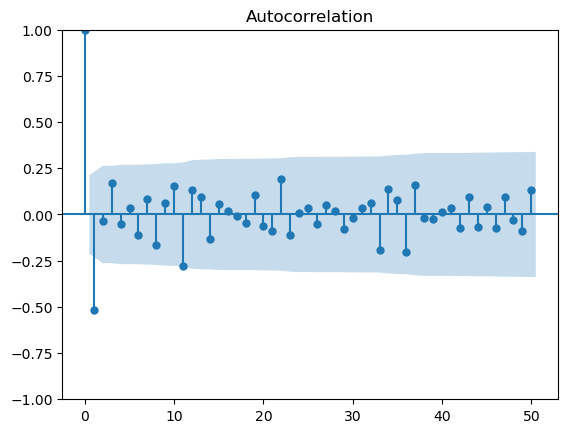

In [8]:
plot_acf(corumba['FEV'].dropna(), lags=50)
plt.show()

In [6]:
corumba

,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
0,285,NaN,494,375,209,135,123,107,103,106,112,147
1,276,-113.0,248,175,120,109,93,72,57,85,110,216
2,417,16.0,247,227,147,113,101,78,71,84,98,192
3,240,-167.0,180,143,108,62,53,43,49,63,57,71
4,305,173.0,313,334,203,124,91,79,45,66,80,136
...,...,...,...,...,...,...,...,...,...,...,...,...
81,314,30.0,193,165,107,85,62,47,46,41,132,109
82,254,-43.0,207,310,140,105,72,52,48,87,84,200
83,149,-61.0,312,325,146,97,74,58,46,35,78,157
84,74,-53.0,214,240,144,89,68,46,37,35,59,70
